<a href="https://colab.research.google.com/github/AndresMontesDeOca/RegresionAvanzada/blob/main/EjerciciosClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Sueltos dados en Clase

In [34]:
# Autor: Andres Montes de Oca

# Instalacion de Paquetes
!pip install pingouin # No incluido en Google Colab
# !pip install scipy
# !pip install statsmodels


# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)


# Version rpy2 que no tiene problemas de compatibilidad
!pip install rpy2==3.5.1

# activate R magic
%load_ext rpy2.ipython

# Import rpy2 for dataframe conversion
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Carga de Datasets

In [35]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# Grasa de Cerdos
id = '153lGVzdixcHT-keKg8qmvaoWdPHg6_tB'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('grasacerdos.xlsx')
dataG = pd.read_excel('grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataG = dataG.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataG = dataG.astype('float') # Transformo en float

######################################################
# Peso, Edad, Colesterol
id = '17Dv1WcWlc9ojWa6bnSfD7TCRaVKCKqj0'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('peso_edad_colest.xlsx')
dataP = pd.read_excel('peso_edad_colest.xlsx')
%R -i dataP
######################################################
# Cars con Modelo Lineal
id = '15pf-6P4Ek2rp6mYmfOybHRqAxqOoTp6i'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cars.csv')
dataC = pd.read_csv('cars.csv')
model_cars = smf.ols('dist ~ speed', data=dataC).fit()
######################################################
# University
id = '16kLQNXhyweAi38xR2IeQCCagVcU725UZ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('University.csv')
dataU = pd.read_csv('University.csv')
######################################################
# Iris
dataI = sns.load_dataset('iris')
%R -i dataI
######################################################
# Gorriones
id = '15G6jIOMiuWaTs-qy7eUXwhED4delBMl6'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('gorriones.xlsx')
dataO = pd.read_excel('gorriones.xlsx')
dataO.rename(columns=
            {'largototal':'Largo', 'extension ':'Alas', 'cabeza':'Cabeza',
             'humero':'Pata', 'esternon':'Cuerpo', 'sobrevida ':'Target'},
            inplace=True)
%R -i dataO



### Clase #2

In [36]:
# print(dataO.describe(), '\n')
# %R print(summary(dataO))

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
  rstudent unadjusted p-value Bonferroni p
7 2.419042            0.02428      0.60699


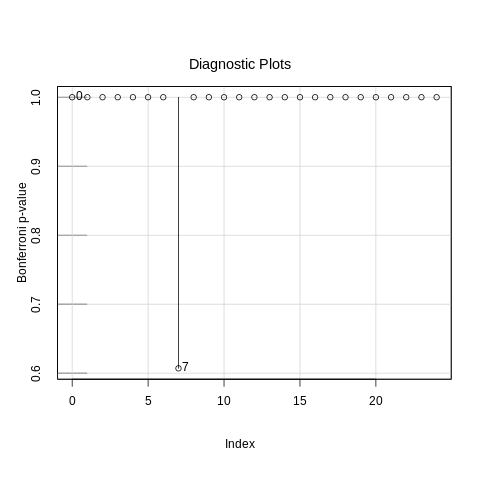

In [37]:
%%R

model_colest_R = lm('colest ~ edad', data=dataP)
residuos <- model_colest_R$residuals
# print(summary(model_colest_R))
# print(anova(model_colest_R))

# Bandas de Prediccion
# predichos <- predict(object=model_colest_R, interval='prediction', level=0.95)

# Test de Normalidad adicionales
# install.packages('nortest')
# library(nortest)
# lillie.test(residuos)
# install.packages('car')
# library(car)
# qqPlot(residuos, pch=19)

# Autocorrelacion de Residuos
# install.packages('lmtest')
# library(lmtest)
# dwtest(model_colest_R, alternative='two.sided', iterations=1000)

# Deteccion Outliers
# library(car)
# qqPlot(residuos)
# print(outlierTest(model_colest_R))
# influenceIndexPlot(model_colest_R, vars='Bonf')

In [49]:
# Leverage
%%R

library(stats)

cota = 3*mean(hatvalues(model_colest_R))
leverage = hatvalues(model_colest_R) > cota
cbind(hatvalues(model_colest_R), cota, leverage)

# Distancias de Cook

              cota leverage
0  0.05099996 0.24        0
1  0.13659973 0.24        0
2  0.08032391 0.24        0
3  0.06277862 0.24        0
4  0.11881927 0.24        0
5  0.09329884 0.24        0
6  0.07345303 0.24        0
7  0.04302483 0.24        0
8  0.11881927 0.24        0
9  0.04531512 0.24        0
10 0.10093657 0.24        0
11 0.05820825 0.24        0
12 0.08032391 0.24        0
13 0.10908552 0.24        0
14 0.14805120 0.24        0
15 0.05872970 0.24        0
16 0.08700053 0.24        0
17 0.05414911 0.24        0
18 0.12805202 0.24        0
19 0.04756452 0.24        0
20 0.05099996 0.24        0
21 0.10908552 0.24        0
22 0.04152182 0.24        0
23 0.04008016 0.24        0
24 0.06277862 0.24        0
